# Simple upscalling test for inversion with flopy 
Valentin Dall'alba 03/2020

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
exec(open('upscalling_functions.py').read())

### Import the simulation 
2D MPS simulations

nx, ny = 409, 512  
ox = 664328.1865  
oy = 6153000.2413  
sx, sy = 100, 100

In [2]:
pathsimu = 'simu_np.pickle'

In [3]:
simu = read_pickle(pathsimu)
#simu = simu.val[0,0]
simu.shape

(512, 409)

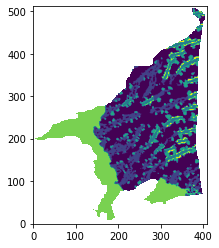

In [4]:
plt.imshow(simu, origin='lower',cmap='viridis')
plt.show()

### Assign facies properties

The simulation is composed of 5 facies:  
0 = plaine innondation  
1 = rivière en tresse  
2 = rivière en méandre  
3 = crevasse splay  
4 = cone alluvial  
5 = levee  

In [5]:
facies_list = [0,1,2,3,4,5]
k_list      = [1e-7,1e-2,1e-3,1e-4,5e-3,1e-6]
simu_k      = assign_k(simu, facies_list, k_list)

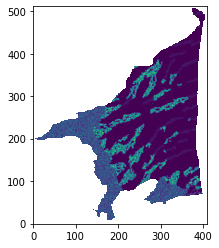

In [6]:
plt.imshow(simu_k, origin='lower',cmap='viridis')

### Upscalling to the flopy grid resolution

In [7]:
%%time
sx = 100
sy = 100
sx_up = 400
sy_up = 400
simu_up = up_array_mean(simu_k, sx, sy, sx_up = sx_up, sy_up = sy_up)

/home/valentin/anaconda3/envs/these/lib/python3.6/site-packages/ipykernel_launcher.py:160: RuntimeWarning: Mean of empty slice


The shape of the ouptut grid is (128, 103)
Upscalling is done!
CPU times: user 1.54 s, sys: 32.9 ms, total: 1.57 s
Wall time: 1.55 s


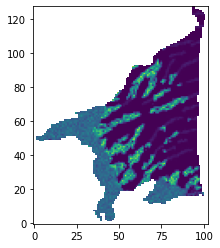

In [8]:
plt.imshow(simu_up,origin='lower')

### Once upscalled we can create a mask for the active cell (1) and non-active cell (0) for the new resolution

In [9]:
mask = create_mask(simu_up)

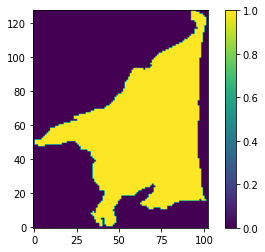

In [10]:
plt.imshow(mask, origin='lower')
plt.colorbar()

### We can export the grid and mask

In [11]:
write_pickle('export_up.pickle',[simu_up, mask])

### To do

Je pense qu'il faut maintenant automatiser l'import dans le script flopy le champ de permeabilité upscaller et le mask pour définir qu'elles sont les cellules actives ou non. (fichier export_up.pickle)  
Ensuite on run la simulation.  
On compare les résultats. On calcul un indice que l'on va chercher à minimiser.  
On modifie les valeurs de perméabilités de la simu, on re-upscalle les valeurs et on recommence la simu...  